# Exercise 1: Data Preparation and Feature Engineering

## Objective:

Prepare a dataset for modeling by handling missing values, engineering features, and splitting the data.

### Task:

**Load and Inspect the Dataset:**
Load the building_energy_consumption.csv dataset.
Inspect the dataset for missing values and outliers.

**Handle Missing Values:**
Remove rows with missing values and inspect the effect on the dataset.
Alternatively, impute missing values using the mean for numerical columns.

**Feature Engineering:**
Create an interaction feature between temperature and energy_consumption.
Extract the month from a date column (if available) and create a new Month feature.

**Feature Scaling:**
Scale the numerical features using standardization.


**Data Splitting:**
Split the dataset into training (80%) and testing (20%) sets.

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load and inspect the dataset
df = pd.read_csv('datasets/building_energy_consumption.csv')
print("Initial dataset shape:", df.shape)
print("Missing values in each column:\n", df.isnull().sum())

# Step 2: Handle missing values
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns with the mean
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Optionally, handle missing values in non-numeric columns (e.g., fill with mode)
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

print("Shape after imputing missing values:", df.shape)

# Step 3: Feature engineering
df['Customer_Spending_Interaction'] = df['temperature'] * df['energy_consumption']
df['date'] = pd.to_datetime(df['date'])  # Assuming there is a 'date' column
df['Month'] = df['date'].dt.month

# Step 4: Feature scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Step 5: Data splitting
X = df_scaled.drop(columns=['energy_consumption'])
y = df_scaled['energy_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
df.head()

Initial dataset shape: (48, 5)
Missing values in each column:
 date                  0
building_type         0
temperature           1
occupancy             1
energy_consumption    1
dtype: int64
Shape after imputing missing values: (48, 5)
Training set size: (38, 6)
Test set size: (10, 6)


,date,building_type,temperature,occupancy,energy_consumption,Customer_Spending_Interaction,Month
0,2023-01-01,Residential,21.23,745.0,1091.46,23171.6958,1
1,2023-01-02,Commercial,16.78,625.0,1762.85,29580.6230,1
2,2023-01-03,Industrial,33.45,308.0,1735.28,58045.1160,1
3,2023-01-04,Industrial,25.37,178.0,10000.00,253700.0000,1
4,2023-01-05,Residential,22.50,210.0,3242.05,72946.1250,1


# Exercise 2: Linear Regression Model Development and Evaluation

Objective: Develop, train, and evaluate a linear regression model for predicting a target variable.

## Task:

**Load the Dataset:**
Load the restaurant_revenue.csv dataset.
Perform data cleaning: handle missing values and encode categorical variables.

**Split the Data:**
Split the dataset into features (X) and target (y).
Perform a train-test split (80%-20%).

**Train a Linear Regression Model:**
Train a linear regression model on the training set.

**Evaluate the Model:**
Use Mean Squared Error (MSE) and R-squared (R²) to evaluate the model’s performance on the test set.
Visualize the results by plotting actual vs. predicted values.

Test MSE: 3560.4388349737933
Test R²: 0.6740626407300359


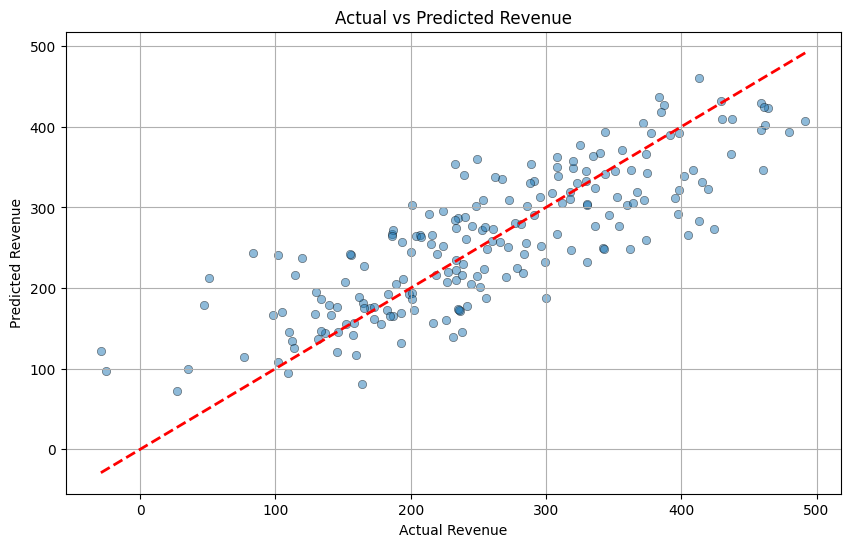

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load and prepare the dataset
df = pd.read_csv('datasets/restaurant_revenue.csv')

# Handle missing values (if any)
df = df.dropna()  # Simplified cleaning step

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Cuisine_Type'], drop_first=True)

# Split data into features and target
X = df.drop(columns=['Monthly_Revenue'])
y = df['Monthly_Revenue']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.show()


# Exercise 3: Classification with Logistic Regression
Objective: Build and evaluate a logistic regression model to predict a binary outcome.

## Task:

**Load the Dataset:**
Load the Human_Resources.csv dataset.
Perform data preparation steps including handling missing values and encoding categorical variables.

**Split the Data:**
Split the dataset into features (X) and target (y).
Perform a train-test split (80%-20%).

**Train a Logistic Regression Model:**
Train a logistic regression model to predict employee attrition.

**Evaluate the Model:**
Evaluate the model using accuracy, confusion matrix, and classification report on the test set.

**Cross-Validation:**
Use 5-fold cross-validation to evaluate the model’s performance.

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and prepare the dataset
df = pd.read_csv('datasets/Human_Resources.csv')
df = df.dropna()  # Simplified cleaning step

# Assuming 'Attrition' is the target column with 'Yes' and 'No' values
# Encode 'Attrition' as binary (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode other categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 2: Split data into features and target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Step 3: Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=2000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Step 7: Cross-Validation
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Test Accuracy: 0.8843537414965986
Test Confusion Matrix:
 [[242  13]
 [ 21  18]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294

Cross-validation scores: [0.90816327 0.87755102 0.86394558 0.8707483  0.89455782]
Mean cross-validation score: 0.8829931972789116
